<a href="https://colab.research.google.com/github/JaledMC/Learning-Artificial-Vision/blob/master/Import_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Drawing functions on images

It is possible to realize arithmetic operations on images using *OpenCV*.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Read image and create a list of images

Read image and create a list of images containing the original picture and its copies.


**_IMPORTANT_** : There are some methods in `cv2` that modifies the original image. So it is important to create a copy using *Python* method  `copy()` in order to mantaing the original image and aporate in copies.

Exercise:


Generate multiple image clones of the image in a list


In [13]:
image = cv2.imread('imgs/windows.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate multiple image clones of the image in a list
photos = [image.copy() for i in range(10)]

## Operate on images

* Draw a line.
* Draw a circle.
* Draw a rectangle.
* Draw a polygon.
* Insert text


**_Good practice_**: Use relative drawing, this is using formulas like: 
    $line_{width} = (width*height)/100$


**_Note_**: Reload images (*code block below*) every time you want to draw again as if e.g.:
   
   <span style="color:red">**WRONG**</span>:
   1. Draw a 50px width line.
   2. Draw a 20px width line (no effect because there is a 50px width line from last time.
   
   
   <span style="color:green">**RIGHT**</span>:
   1. Draw a 50px width line.
   3. Reload images.
   2. Draw a 20px width line (no effect because there is a 50px width line from last time.
  
**_SEE ALL OPERATIONS BELOW_**

### Draw a line

To draw a line it is possible to use `cv2`'s method `line`. 

`cv2.line(image, (start coordinate, finish coordinate), color, width);`

Exercise:

Draw a line on a photo of the previous list and plot the original and the new one with a line


line width: 50


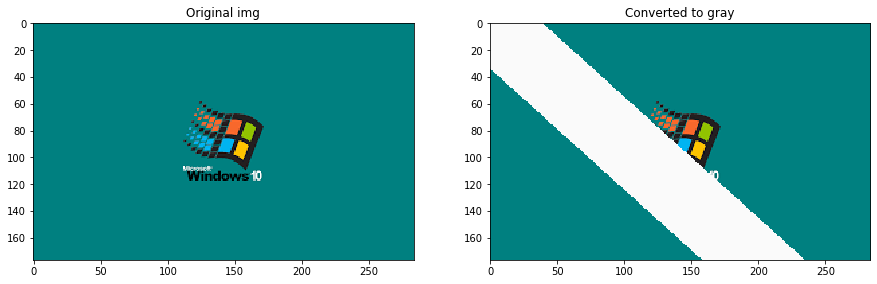

In [23]:
image = cv2.imread('imgs/windows.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate multiple image clones of the image in a list
photos = [image.copy() for i in range(10)]
width, height, dimension = photos[1].shape
line_width = int(width*height/1000)

# check line_width
print("line width:",line_width)

 # If you want to see output and check that there are 250 250 250 value pixels, delete ;
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(photos[1])
axs[0].set_title("Original img")
axs[1].imshow(cv2.line(photos[1], (0, 0), (500, 450), (250, 250, 250), line_width))
axs[1].set_title("Converted to gray")
plt.show()

### Draw a circle

To draw a circle it is possible to use `cv2`'s method `circle`. 

`cv2.circle(image, centre_coordinate, radius, color, width)`
**_note_**: If `width` value is negative, then the circle if filled: (*negative == fill*)


line width: 50


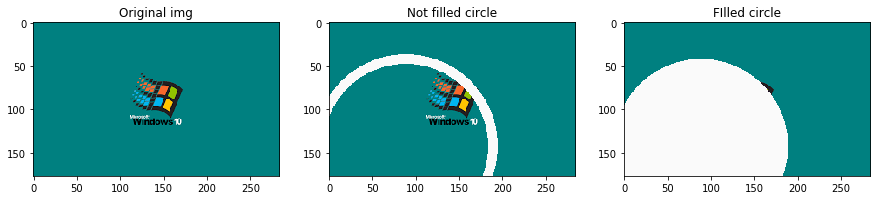

In [50]:
image = cv2.imread('imgs/windows.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate multiple image clones of the image in a list
photos = [image.copy() for i in range(10)]
width, height, dimension = photos[1].shape
line_width = int(width*height/1000)

# check line_width
print("line width:",line_width)

 # If you want to see output and check that there are 250 250 250 value pixels, delete ;
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(photos[1])
axs[0].set_title("Original img")
axs[1].imshow(cv2.circle(photos[1], (round(width/2), round(height/2)), 100, (250, 250, 250), 10))
axs[1].set_title("Not filled circle")
photos1 = [image.copy() for i in range(10)]
axs[2].imshow(cv2.circle(photos1[1], (round(width/2), round(height/2)), 100, (250, 250, 250), -10))
axs[2].set_title("FIlled circle")
plt.show()


### Draw a rectangle

To draw a rectangle it is possible to use `cv2`'s method `rectangle`.

`cv2.rectangle(image, border_coor_1, border_coor_2, color, width)`

line width: 50


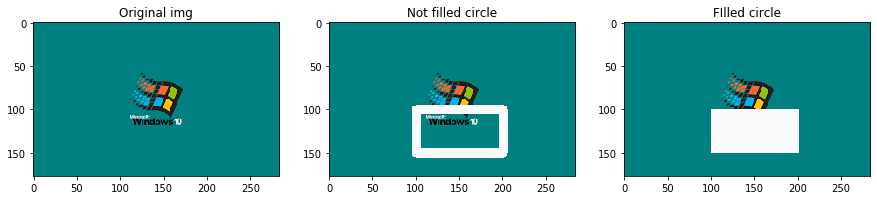

In [56]:
image = cv2.imread('imgs/windows.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate multiple image clones of the image in a list
photos = [image.copy() for i in range(10)]
width, height, dimension = photos[1].shape
line_width = int(width*height/1000)

# check line_width
print("line width:",line_width)

 # If you want to see output and check that there are 250 250 250 value pixels, delete ;
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(photos[1])
axs[0].set_title("Original img")
axs[1].imshow(cv2.rectangle(photos[1], (100, 100), (200,150), (250, 250, 250), 10))
axs[1].set_title("Not filled rectangle")
photos1 = [image.copy() for i in range(10)]
axs[2].imshow(cv2.rectangle(photos1[1], (100, 100), (200,150), (250, 250, 250), -10))
axs[2].set_title("Filled rectangle")
plt.show()

### Draw a polygon

To draw a polygon it is possible to use `cv2`'s method `polylines`. 

 set of points. Params: 
 
 `cv2.polycicles(image, points, close-shape, color, width)`


Text(0.5, 1.0, 'Not filled rectangle')

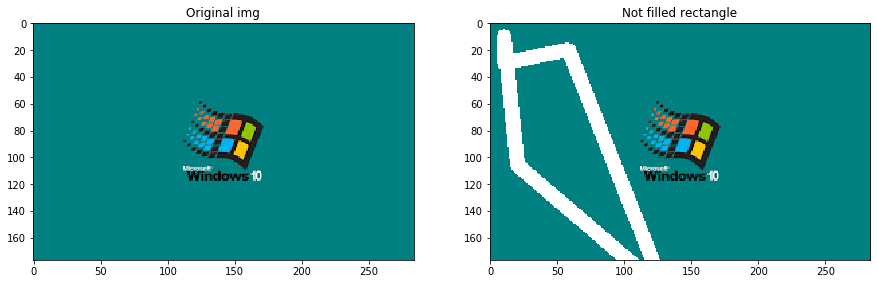

In [65]:
image = cv2.imread('imgs/windows.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Generate multiple image clones of the image in a list
photos = [image.copy() for i in range(10)]
# first select some points in form of a numpy array
points = np.array([[10, 10], [20, 106], [130, 200], [58, 20], [10, 30]], np.int32)
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(photos[1])
axs[0].set_title("Original img")
axs[1].imshow(cv2.polylines(photos[1], [points], True, (255, 255, 255), 10))
axs[1].set_title("Not filled rectangle")


 ### Insert text in image
 
 to put text on the image it is possible to use `cv2`'s method `putText`.
 
 `cv2.putText(image, text, origin, font, fontScale, color, thickness, lineType)`

In [68]:
font = cv2.FONT_HERSHEY_SIMPLEX

text = 'OpenCV'
cv2.putText(photos[0], text, (int(height/2)-60, int(width/2)-60), font, 1, (200, 255, 155), 3, cv2.LINE_AA);


## Wrap up

Following points need to be clear in your mind to be able to advance in `cv2`:

* Create a copy of the image in order to not rewrite the original:
    * *idea:* list of images.
    
* Reload images: 
    *  Reset list of images.
   
* Draw on images:
    *  Use relative drawing so it is simple to refactor when you change images.
    *  OpenCV has different shapes to draw including text.